### Engineer new features for percentage of KOs Regained > Win ###
@todo
Raghu: The feature looks fine, please proceed to perform the same activity for other important features such as Pass_Diff and Ruck_Maul.
* Create "Series Year", i.e., 2017-18, based on Date.  Need to account for tournaments straddling years: i.e., Dec 15 tournament belongs in 2015-16 tournament year. Use time series analysis.

### Look at scaling data?

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit only to the training data
#scaler.fit(X_train)

# StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

In [46]:
#Import Raw (not Diff) Match Data
df = pd.read_csv('../data/output/all_7s_matches.csv')
df
#230 rows × 17 columns

,Team,Date,Tournament,Match,Possession Time,Scores,Tries,Conversions,Passes,Contestable_Restart_Win_Pct,Pens_Frees Against,Ruck_Maul,Yellow_Red Cards,TurnoversConceded,Ruck_retention,Lineout_Win_Pct,Scrum_Win_Pct
0,USA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,204,21,3,1.000000,34,0.000000,5,4,0,2,0.750000,1.000000,1.0
1,AUSTRALIA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,154,26,4,0.750000,20,50.000000,5,4,1,1,0.666667,0.666667,0.0
2,USA,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,187,26,4,0.750000,39,25.000000,2,0,0,9,1.000000,0.000000,1.0
3,WALES,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,161,19,3,0.666667,22,0.000000,3,2,0,5,0.750000,1.000000,1.0
4,KENYA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,225,26,4,0.750000,26,50.000000,1,1,0,4,0.800000,1.000000,1.0
5,USA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,113,10,2,0.000000,21,66.666667,5,4,0,3,0.250000,0.000000,1.0
6,NEW ZEALAND,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,96,14,2,1.000000,8,0.000000,3,3,0,2,0.666667,1.000000,1.0
7,USA,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,302,28,4,1.000000,59,75.000000,1,0,0,5,0.916667,1.000000,0.0
8,FIJI,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,186,29,5,0.400000,20,0.000000,2,2,0,4,0.666667,1.000000,1.0
9,USA,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,241,19,3,0.666667,45,66.666667,1,1,0,10,0.875000,0.000000,1.0


#From Raghu
#20% regains  40% regains    60% regains
#0                             0.6*50

In [47]:
#Create a Result column for Win/Loss. Do in pre-processing code?

#Temp DF to hold 'Result'
sub = pd.DataFrame(columns=['Result'])

#Iterate through rows and create 'Result' for Win/Loss (Win=1, Win=0)
for index, row in df.iterrows():
    if index%2 == 0:
        new_row = df.iloc[index+1]
        if row['Match'] == new_row['Match']:
            if row['Scores'] > new_row['Scores']:
                result1 = row['Result'] = 1
                result2 = new_row['Result'] = 0
            elif row['Scores'] < new_row['Scores']:
                result1 = row['Result'] = 0
                result2 = new_row['Result'] = 1
            else:
                result1 = row['Result'] = 2
                result2 = new_row['Result'] = 2

            sub.loc[index] = (result1)
            sub.loc[index+1]  = (result2)

df = pd.concat([df, sub], axis=1)
df

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:747: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/admin/anaconda3/lib/python3.6/site-packages/ipyke

,Team,Date,Tournament,Match,Possession Time,Scores,Tries,Conversions,Passes,Contestable_Restart_Win_Pct,Pens_Frees Against,Ruck_Maul,Yellow_Red Cards,TurnoversConceded,Ruck_retention,Lineout_Win_Pct,Scrum_Win_Pct,Result
0,USA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,204,21,3,1.000000,34,0.000000,5,4,0,2,0.750000,1.000000,1.0,0
1,AUSTRALIA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,154,26,4,0.750000,20,50.000000,5,4,1,1,0.666667,0.666667,0.0,1
2,USA,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,187,26,4,0.750000,39,25.000000,2,0,0,9,1.000000,0.000000,1.0,1
3,WALES,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,161,19,3,0.666667,22,0.000000,3,2,0,5,0.750000,1.000000,1.0,0
4,KENYA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,225,26,4,0.750000,26,50.000000,1,1,0,4,0.800000,1.000000,1.0,1
5,USA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,113,10,2,0.000000,21,66.666667,5,4,0,3,0.250000,0.000000,1.0,0
6,NEW ZEALAND,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,96,14,2,1.000000,8,0.000000,3,3,0,2,0.666667,1.000000,1.0,0
7,USA,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,302,28,4,1.000000,59,75.000000,1,0,0,5,0.916667,1.000000,0.0,1
8,FIJI,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,186,29,5,0.400000,20,0.000000,2,2,0,4,0.666667,1.000000,1.0,1
9,USA,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,241,19,3,0.666667,45,66.666667,1,1,0,10,0.875000,0.000000,1.0,0


In [48]:
#Create columns for KO win % bands based on Contestable_Restart_Win_Pct
# Tmp DF to hold values
tmp = pd.DataFrame(columns=['0 - 25', '25 - 50', '50 - 75', '75 - 100'])

#Iterate through rows and create classification for KO Win%
for index, row in df.iterrows():
    
    #if row['Contestable_Restart_Win_Pct'] == 0:
        #zero = row['0'] = float(0)
        #under25 = row['0 - 25'] = float(0)
        #under50 = row['25 - 50'] = float(0)
        #under75 = row['50 - 75'] = float(0)
        #under100 = row['75 - 100'] = float(0)

    if row['Contestable_Restart_Win_Pct'] >= 0 and row['Contestable_Restart_Win_Pct'] <= 25.0:
        #zero = row['0'] = float(0)
        under25 = row['0 - 25'] = float(0.25*50)
        under50 = row['25 - 50'] = float(0)
        under75 = row['50 - 75'] = float(0)
        under100 = row['75 - 100'] = float(0)

    elif row['Contestable_Restart_Win_Pct'] > 25.0 and row['Contestable_Restart_Win_Pct'] <= 50.0:
        #zero = row['0'] = float(0)
        under25 = row['0 - 25'] = float(0)
        under50 = row['25 - 50'] = float(0.50*50)
        under75 = row['50 - 75'] = float(0)
        under100 = row['75 - 100'] = float(0)

    elif row['Contestable_Restart_Win_Pct'] > 50.0 and row['Contestable_Restart_Win_Pct'] <= 75.0:
        #zero = row['0'] = float(0)
        under25 = row['0 - 25'] = float(0)
        under50 = row['25 - 50'] = float(0)
        under75 = row['50 - 75'] = float(0.75*50)
        under100 = row['75 - 100'] = float(0)

    elif row['Contestable_Restart_Win_Pct'] > 75.0 and row['Contestable_Restart_Win_Pct'] <= 100.0:
        #zero = row['0'] = float(0)
        under25 = row['0 - 25'] = float(0)
        under50 = row['25 - 50'] = float(0)
        under75 = row['50 - 75'] = float(0)
        under100 = row['75 - 100'] = float(1.00*50)

    tmp.loc[index] = (under25, under50, under75, under100)

#df.info()
#type(df.Result[1])
df = pd.concat([df, tmp], axis=1)

df.to_csv("../data/output/matchdata_ko_bands.csv", header=True, index=False)

#print(list(df.columns))
# ['Team', 'Date', 'Tournament', 'Match', 'Possession Time', 'Scores', 'Tries', 'Conversions', 'Passes', 'Contestable_Restart_Win_Pct', 'Pens_Frees Against', 'Ruck_Maul', 'Yellow_Red Cards', 'TurnoversConceded', 'Ruck_retention', 'Lineout_Win_Pct', 'Scrum_Win_Pct', 'Result', '0', '0 - 25', '25 - 50', '50 - 75', '75 - 100']
df

,Team,Date,Tournament,Match,Possession Time,Scores,Tries,Conversions,Passes,Contestable_Restart_Win_Pct,...,Yellow_Red Cards,TurnoversConceded,Ruck_retention,Lineout_Win_Pct,Scrum_Win_Pct,Result,0 - 25,25 - 50,50 - 75,75 - 100
0,USA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,204,21,3,1.000000,34,0.000000,...,0,2,0.750000,1.000000,1.0,0,12.5,0.0,0.0,0.0
1,AUSTRALIA,2015-12-15,2015_Cape_Town,Match_18_USA_vs_Australia,154,26,4,0.750000,20,50.000000,...,1,1,0.666667,0.666667,0.0,1,0.0,25.0,0.0,0.0
2,USA,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,187,26,4,0.750000,39,25.000000,...,0,9,1.000000,0.000000,1.0,1,12.5,0.0,0.0,0.0
3,WALES,2015-12-15,2015_Cape_Town,Match_1_USA_vs_Wales,161,19,3,0.666667,22,0.000000,...,0,5,0.750000,1.000000,1.0,0,12.5,0.0,0.0,0.0
4,KENYA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,225,26,4,0.750000,26,50.000000,...,0,4,0.800000,1.000000,1.0,1,0.0,25.0,0.0,0.0
5,USA,2015-12-15,2015_Cape_Town,Match_32_Kenya_vs_USA,113,10,2,0.000000,21,66.666667,...,0,3,0.250000,0.000000,1.0,0,0.0,0.0,37.5,0.0
6,NEW ZEALAND,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,96,14,2,1.000000,8,0.000000,...,0,2,0.666667,1.000000,1.0,0,12.5,0.0,0.0,0.0
7,USA,2015-12-15,2015_Cape_Town,Match_38_New_Zealand_vs_USA,302,28,4,1.000000,59,75.000000,...,0,5,0.916667,1.000000,0.0,1,0.0,0.0,37.5,0.0
8,FIJI,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,186,29,5,0.400000,20,0.000000,...,0,4,0.666667,1.000000,1.0,1,12.5,0.0,0.0,0.0
9,USA,2015-12-15,2015_Cape_Town,Match_43_Fiji_vs_USA,241,19,3,0.666667,45,66.666667,...,0,10,0.875000,0.000000,1.0,0,0.0,0.0,37.5,0.0


## Plot each band of KO wins which resulted in a win

In [49]:
#Select USA Wins
usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]

#Select USA Losses
usa_l = df[(df['Team'] == 'USA') & (df['Result'] == 0)]

In [50]:
usa_w
print(usa_w.describe())

       Possession Time     Scores      Tries  Conversions     Passes  \
count        62.000000  62.000000  62.000000    62.000000  62.000000   
mean        226.064516  28.080645   4.403226     0.691475  38.177419   
std          50.181922   9.129844   1.372561     0.222519  13.914875   
min         131.000000  12.000000   2.000000     0.200000  11.000000   
25%         198.750000  21.250000   3.250000     0.500000  29.000000   
50%         226.000000  26.000000   4.000000     0.690476  37.000000   
75%         251.750000  33.000000   5.000000     0.825000  44.000000   
max         379.000000  52.000000   8.000000     1.000000  82.000000   

       Contestable_Restart_Win_Pct  Pens_Frees Against  Ruck_Maul  \
count                    62.000000           62.000000  62.000000   
mean                     42.188940            2.822581   2.048387   
std                      25.966605            1.552620   1.311080   
min                       0.000000            0.000000   0.000000   
25%   

In [51]:
#df[(df['Team'] == 'USA')
#band0 = usa_w[(usa_w['0'] > 0)]
#band0 = band0['0'].count()
#print("Count for 0")
#print(band0)

band1 = usa_w[(usa_w['0 - 25'] > 0)]
band1 = band1['0 - 25'].count()
print("Count for 0-25")
print(band1)

band2 = usa_w[(usa_w['25 - 50'] > 0)]
band2 = band2['25 - 50'].count()
print("Count for 25-50")
print(band2)

band3 = usa_w[(usa_w['50 - 75'] > 0)]
band3 = band3['50 - 75'].count()
print("Count for 50 - 75")
print(band3)

band4 = usa_w[(usa_w['75 - 100'] > 0)]
band4 = band4['75 - 100'].count()
print("Count for 75 - 100")
print(band4)

Count for 0-25
18
Count for 25-50
24
Count for 50 - 75
17
Count for 75 - 100
3


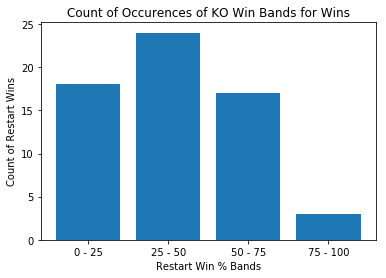

In [52]:
#Create list of values
band_list = [('0 - 25', band1), ('25 - 50', band2), ('50 - 75', band3), ('75 - 100', band4)]

labels, values = zip(*band_list)
plt.bar(labels,values)
plt.title("Count of Occurences of KO Win Bands for Wins")
plt.ylabel('Count of Restart Wins')
plt.xlabel('Restart Win % Bands')
#plt.xticks(labels)
plt.show()

## Fit a Random Forest model, examine Feature Importance

In [54]:
#Split Train & Test splits
from sklearn.model_selection import train_test_split

#Drop features that are unneccessary/str or will bias the prediction
rf_data = df.drop((['Team', 'Date', 'Tournament', 'Match', 'Scores', 'Tries', 'Conversions']), axis=1)

#Drop ties (Result == 2) from dataframe - causing issues with logistic regression
rf_data.drop(rf_data[rf_data.Result == 2].index, inplace=True)

#Build model from only KO% values
#rf_data = df[['0 - 25','25 - 50','50 - 75', '75 - 100', 'Result']]

#Pull out the variable we're trying to predict: 'Result'
X = rf_data.drop('Result',axis=1)
y = rf_data['Result']
y=y.astype('int')

#Train-Test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 77)

In [55]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 0.50
Baseline Performance on the test set: MAE = 0.5000


In [56]:
# Fit RF model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, verbose=0)
rfc.fit(X_train, y_train)

# Run predictions
rfc_pred = rfc.predict(X_test)

Confusion Matrix
[[13 16]
 [13 26]]


Confusion Matrix Plot


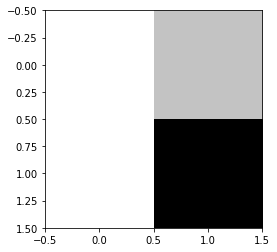



Classification Report
             precision    recall  f1-score   support

          0       0.50      0.45      0.47        29
          1       0.62      0.67      0.64        39

avg / total       0.57      0.57      0.57        68



Accuracy Score
0.573529411765


In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Output confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,rfc_pred))

#import matplotlib.pyplot as plt
print("\n")
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,rfc_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

#import libraries to ignore UndefinedMetricWarning
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

#get the model's accuracy score
accuracy_score(y_test, rfc_pred)
print("\n")
print("Classification Report")
print(classification_report(y_test,rfc_pred))

#print accuracy score
print("\n")
print("Accuracy Score")
print(rfc.score(X_test, y_test))

## Extract feature importance

In [58]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importance")
print(feature_importances)

Feature Importance
                             importance
Possession Time                0.159300
Passes                         0.135883
TurnoversConceded              0.130576
Ruck_retention                 0.107399
Pens_Frees Against             0.103239
Contestable_Restart_Win_Pct    0.102719
Ruck_Maul                      0.068393
Scrum_Win_Pct                  0.055775
Lineout_Win_Pct                0.052653
0 - 25                         0.020505
50 - 75                        0.019534
Yellow_Red Cards               0.018716
25 - 50                        0.016988
75 - 100                       0.008319


In [ ]:
#Create a DF of only the most important features
#impt = df[['Poss_Time_Diff','Passes_Diff','Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'Ruck_Win_pct_Diff', 'Result']]

#impt = df[['0 - 25', '25 - 50', '50 - 75', '75 - 100', 'Result']]

#Plot relationships of all important features
#print("Relationships of all important features")
#sns.pairplot(impt, hue='Result', palette='Set1') #hue='Result'

## Train an XGBoost Classifier Model
Info from https://jessesw.com/XG-Boost/

In [59]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

## Set up hyperparameter tuning/Grid Search

In [70]:
#Set parameters for first grid search. Start tuning on the maximum depth of the trees first, 
#along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version 
#of gradient boosted trees. We set the objective to ‘binary:logistic’ since this is a binary 
#classification problem
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy
# Changed 'cv' parameter (CV FOLDS) from 5 to 3. The CV folds cannot be more than the 
# Min occurrences of any one label ('result' = 2 for ties, perhaps? Very few occurrences)

In [71]:
# Run the grid search
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [72]:
# Check grid scores
optimized_GBM.grid_scores_
# increased score to 66% - over 57% of Random Forest:
# mean: 0.66026, std: 0.02747, params: {'max_depth': 5, 'min_child_weight': 1}

[mean: 0.63462, std: 0.02553, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.64103, std: 0.03437, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.59615, std: 0.06374, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.64744, std: 0.04174, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.66026, std: 0.02406, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.59615, std: 0.06374, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.63462, std: 0.02399, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.66026, std: 0.02406, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.59615, std: 0.06374, params: {'max_depth': 7, 'min_child_weight': 5}]

use these parameters (resulting in mean: 0.66026):

** params: {'max_depth': 5, 'min_child_weight': 3} **

Adjust subsampling along with lowering the learning rate to see if that helps

In [85]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 3}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
# Run the grid search again
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [86]:
# changed CV to 5, estimators from 1000 to 100: check the Grid Scores again - gained 0.66026 > 0.67308
# mean: 0.67308, std: 0.02643, params: {'learning_rate': 0.1, 'subsample': 0.8}
optimized_GBM.grid_scores_

[mean: 0.66026, std: 0.03461, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.67308, std: 0.02643, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.66026, std: 0.03460, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.62179, std: 0.03240, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.66026, std: 0.02428, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.63462, std: 0.04395, params: {'learning_rate': 0.01, 'subsample': 0.9}]

### Final parameters:
Got to 67% (mean: 0.67308, std: 0.02643) with the parameters below:

params: {'learning_rate': 0.1, 'subsample': 0.8, 'max_depth': 5, 'min_child_weight': 3}

ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 1}

## Create a DMatrix
To increase the performance of XGBoost's speed through many iterations of the training set, and since we are using only XGBoost's API and not sklearn's anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:

In [82]:
xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

## Early stopping CV

Specify parameters (with slightly different syntax in some places for the XGBoost native API) and set our stopping criteria. For now, let's be aggressive with the stopping and say we don't want the accuracy to improve for at least 100 new trees.

Parameters:
* Learning_rate (eta) = 0.1
* Subsample, colsample_bytree = 0.8
* Max_depth = 5
* Min_child_weight = 3

Also, change CV fold to 'nfold = 5'

Encountered error - need to drop "ties" (result = 2) from data set?
* XGBoostError: b'[07:25:18] src/objective/regression_obj.cc:103: Check failed: Loss::CheckLabel(y) label must be in [0,1] for logistic regression\n *


In [89]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 3,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

Look at CV results to see how accurate we were with these settings

In [90]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
51,0.358975,0.055143,0.115385,0.007851
52,0.358974,0.050474,0.118590,0.004533
53,0.352564,0.055143,0.125000,0.007851
54,0.352564,0.039516,0.121795,0.009065
55,0.346154,0.062807,0.115385,0.007851


CV test error at this number of iterations is 0.346154, or **65% accuracy**.

Now that we have our best settings, create this as an XGBoost object model that we can reference later.

In [91]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':3} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 55)
# num_boost_round = 55 is from the early stopping rounds - final iteration

## Plot Feature Importance

With our XG model object, we can then plot our feature importances using a built-in method. This is similar to the feature importances found in sklearn.

In [92]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

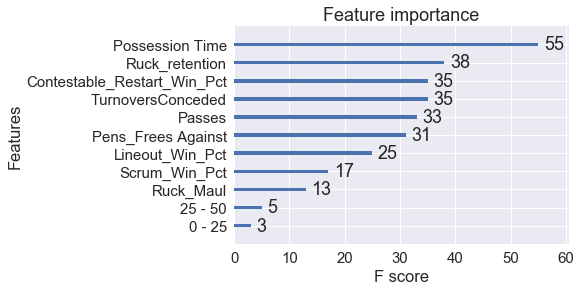

In [93]:
xgb.plot_importance(final_gb)

Additional way to list feature importance using the get_fscore method:

In [102]:
importances = final_gb.get_fscore()
importances

{'0 - 25': 3,
 '25 - 50': 5,
 'Contestable_Restart_Win_Pct': 35,
 'Lineout_Win_Pct': 25,
 'Passes': 33,
 'Pens_Frees Against': 31,
 'Possession Time': 55,
 'Ruck_Maul': 13,
 'Ruck_retention': 38,
 'Scrum_Win_Pct': 17,
 'TurnoversConceded': 35}

In [104]:
for key, value in sorted(importances.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

SyntaxError: invalid syntax (<ipython-input-104-0d477d280082>, line 1)

## Analyzing Performance on Test Data

The model has now been tuned using cross-validation grid search through the sklearn API and early stopping through the built-in XGBoost API. Now, we can see how it finally performs on the test set. Does it match our CV performance? First, create another DMatrix (this time for the test data).

In [96]:
testdmat = xgb.DMatrix(X_test)

Use sklearn's accuracy metric to see how well the model did on the test set.

In [97]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.76535475,  0.73236507,  0.67433023,  0.79897934,  0.3333464 ,
        0.10659481,  0.67724705,  0.70420521,  0.59631157,  0.93726754,
        0.875229  ,  0.37054172,  0.32896498,  0.45094573,  0.74052703,
        0.3381438 ,  0.58262485,  0.36727923,  0.80369067,  0.62500346,
        0.52496135,  0.1783316 ,  0.21901031,  0.230628  ,  0.74114937,
        0.59080523,  0.81479454,  0.80700111,  0.08829919,  0.40290934,
        0.15712303,  0.78431904,  0.42877942,  0.90164536,  0.53387064,
        0.4313443 ,  0.32933766,  0.77192259,  0.35135469,  0.57380962,
        0.69417369,  0.58420795,  0.73964578,  0.47032598,  0.65216249,
        0.71412396,  0.62581331,  0.45617184,  0.39979365,  0.67913735,
        0.67909253,  0.5176909 ,  0.88163674,  0.35896584,  0.29555926,
        0.74458742,  0.90231776,  0.57827342,  0.43325734,  0.40570354,
        0.86131901,  0.45866829,  0.42143804,  0.37888351,  0.48531345,
        0.66770685,  0.41940993,  0.21543434], dtype=float32)

You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold.

In [98]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.], dtype=float32)

Now we can calculate our accuracy.

In [99]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.63235294117647056, 0.36764705882352944)

Accuracy of 63.2%, error rate of 36.8%

Need to do more feature engineering to improve accuracy?